# Academic Stress Level Analysis
## Exploratory Data Analysis of Student Survey Data

This notebook analyzes survey data on academic stress levels, examining relationships between peer pressure, academic pressure, study environment, coping strategies, and stress indices across different academic stages (high school, undergraduate, post-graduate).

**Dataset Overview:**
- Multiple survey responses collected over July-August 2025
- Variables include academic stage, pressure sources, study environment, coping strategies, and stress ratings
- Comprehensive analysis to identify factors affecting student stress levels

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set visualization styles
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('Libraries imported successfully')

Libraries imported successfully


## Section 1: Load and Inspect the Data

In [2]:
# Load the CSV file
file_path = 'academic Stress level - maintainance 1.csv'
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names and Data Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
display(df.head())
print("\nDataset Info:")
display(df.info())

Dataset Shape: (140, 9)

Column Names and Data Types:
Timestamp                                                                str
Your Academic Stage                                                      str
Peer pressure                                                          int64
Academic pressure from your home                                       int64
Study Environment                                                        str
What coping strategy you use as a student?                               str
Do you have any bad habits like smoking, drinking on a daily basis?      str
What would you rate the academic  competition in your student life     int64
Rate your academic stress index                                        int64
dtype: object

First 5 rows:


,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5



Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype
---  ------                                                               --------------  -----
 0   Timestamp                                                            140 non-null    str  
 1   Your Academic Stage                                                  140 non-null    str  
 2   Peer pressure                                                        140 non-null    int64
 3   Academic pressure from your home                                     140 non-null    int64
 4   Study Environment                                                    139 non-null    str  
 5   What coping strategy you use as a student?                           140 non-null    str  
 6   Do you have any bad habits like smoking, drinking on a daily basis?  140 non-null    str  
 7   What would you rate the

None

## Section 2: Data Cleaning and Preprocessing

In [3]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nMissing Value Percentage:")
print((df.isnull().sum() / len(df) * 100).round(2))

# Fill missing Study Environment with 'Unknown'
df['Study Environment'] = df['Study Environment'].fillna('Unknown')

# Rename columns for easier access
df.columns = ['Timestamp', 'Academic_Stage', 'Peer_Pressure', 'Academic_Pressure_Home', 
              'Study_Environment', 'Coping_Strategy', 'Bad_Habits', 'Academic_Competition', 'Stress_Index']

# Convert pressure and stress columns to numeric
numeric_cols = ['Peer_Pressure', 'Academic_Pressure_Home', 'Academic_Competition', 'Stress_Index']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %H:%M:%S')

print("\nData after cleaning:")
print(df.dtypes)
print("\nMissing values after cleaning:")
print(df.isnull().sum())

Missing Values:
Timestamp                                                              0
Your Academic Stage                                                    0
Peer pressure                                                          0
Academic pressure from your home                                       0
Study Environment                                                      1
What coping strategy you use as a student?                             0
Do you have any bad habits like smoking, drinking on a daily basis?    0
What would you rate the academic  competition in your student life     0
Rate your academic stress index                                        0
dtype: int64

Missing Value Percentage:
Timestamp                                                              0.00
Your Academic Stage                                                    0.00
Peer pressure                                                          0.00
Academic pressure from your home                           

## Section 3: Exploratory Data Analysis

In [4]:
# Summary statistics for numeric columns
print("Summary Statistics for Numeric Columns:")
display(df[numeric_cols].describe())

# Value counts for categorical columns
print("\n\nAcademic Stage Distribution:")
print(df['Academic_Stage'].value_counts())

print("\n\nStudy Environment Distribution:")
print(df['Study_Environment'].value_counts())

print("\n\nCoping Strategy Distribution:")
print(df['Coping_Strategy'].value_counts())

print("\n\nBad Habits Distribution:")
print(df['Bad_Habits'].value_counts())

Summary Statistics for Numeric Columns:


,Peer_Pressure,Academic_Pressure_Home,Academic_Competition,Stress_Index
count,140.000000,140.000000,140.000000,140.000000
mean,3.071429,3.178571,3.492857,3.721429
std,1.083844,1.276618,1.028349,1.032339
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000




Academic Stage Distribution:
Academic_Stage
undergraduate    100
high school       29
post-graduate     11
Name: count, dtype: int64


Study Environment Distribution:
Study_Environment
Peaceful     69
disrupted    38
Noisy        32
Unknown       1
Name: count, dtype: int64


Coping Strategy Distribution:
Coping_Strategy
Analyze the situation and handle it with intellect    87
Emotional breakdown (crying a lot)                    32
Social support (friends, family)                      21
Name: count, dtype: int64


Bad Habits Distribution:
Bad_Habits
No                   123
Yes                   10
prefer not to say      7
Name: count, dtype: int64


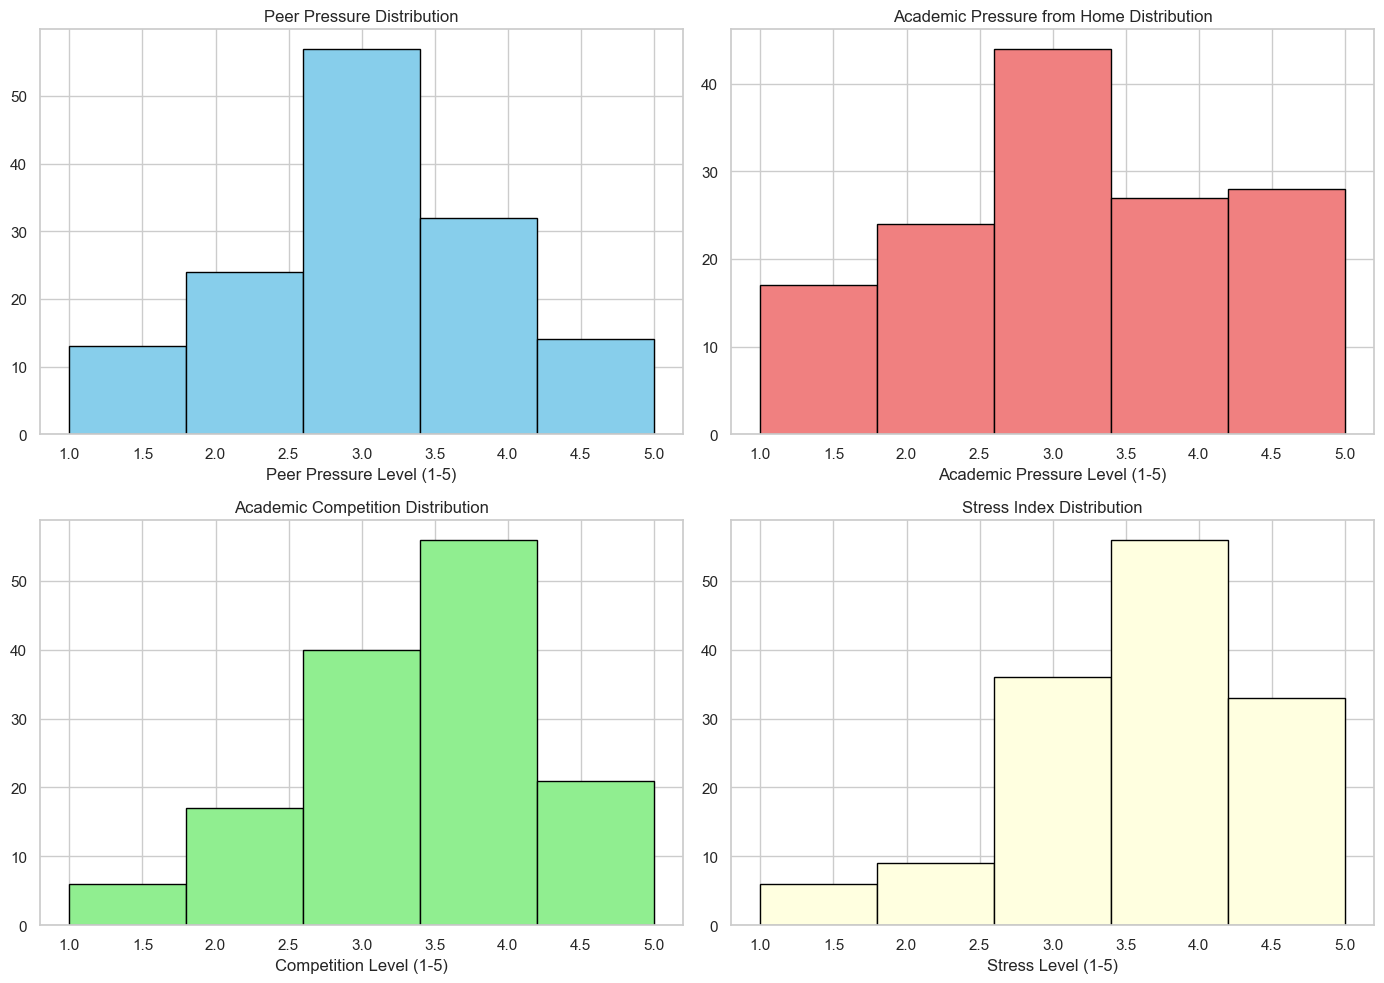

In [5]:
# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Peer Pressure distribution
axes[0, 0].hist(df['Peer_Pressure'].dropna(), bins=5, edgecolor='black', color='skyblue')
axes[0, 0].set_title('Peer Pressure Distribution')
axes[0, 0].set_xlabel('Peer Pressure Level (1-5)')

# Academic Pressure from Home distribution
axes[0, 1].hist(df['Academic_Pressure_Home'].dropna(), bins=5, edgecolor='black', color='lightcoral')
axes[0, 1].set_title('Academic Pressure from Home Distribution')
axes[0, 1].set_xlabel('Academic Pressure Level (1-5)')

# Academic Competition distribution
axes[1, 0].hist(df['Academic_Competition'].dropna(), bins=5, edgecolor='black', color='lightgreen')
axes[1, 0].set_title('Academic Competition Distribution')
axes[1, 0].set_xlabel('Competition Level (1-5)')

# Stress Index distribution
axes[1, 1].hist(df['Stress_Index'].dropna(), bins=5, edgecolor='black', color='lightyellow')
axes[1, 1].set_title('Stress Index Distribution')
axes[1, 1].set_xlabel('Stress Level (1-5)')

plt.tight_layout()
plt.show()

## Section 4: Stress Index Distribution by Academic Stage

Stress Index by Academic Stage:
                count      mean       std  min  25%  50%  75%  max
Academic_Stage                                                    
high school      29.0  3.827586  1.136064  1.0  3.0  4.0  5.0  5.0
post-graduate    11.0  3.727273  0.646670  3.0  3.0  4.0  4.0  5.0
undergraduate   100.0  3.690000  1.041512  1.0  3.0  4.0  4.0  5.0


<Figure size 1000x600 with 0 Axes>

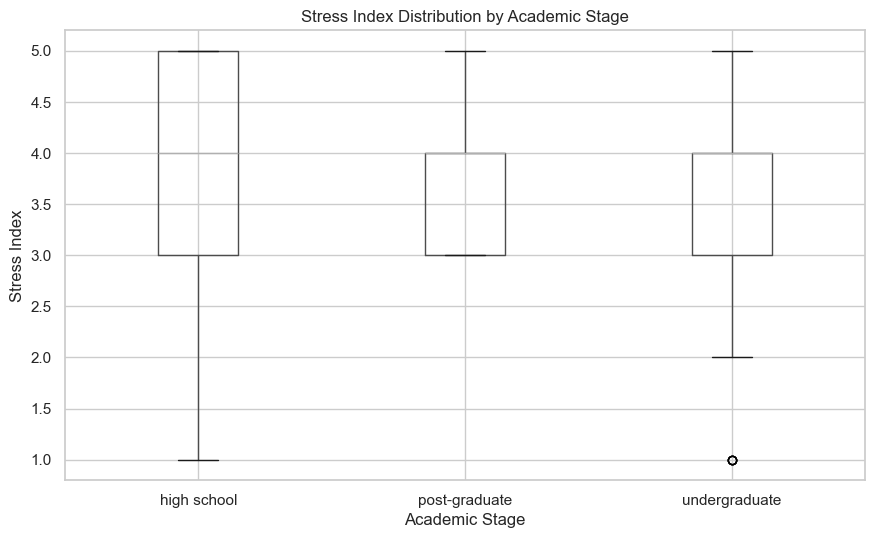

C:\Users\josep\AppData\Local\Temp\ipykernel_17664\2829372384.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Academic_Stage', y='Stress_Index', palette='Set2')


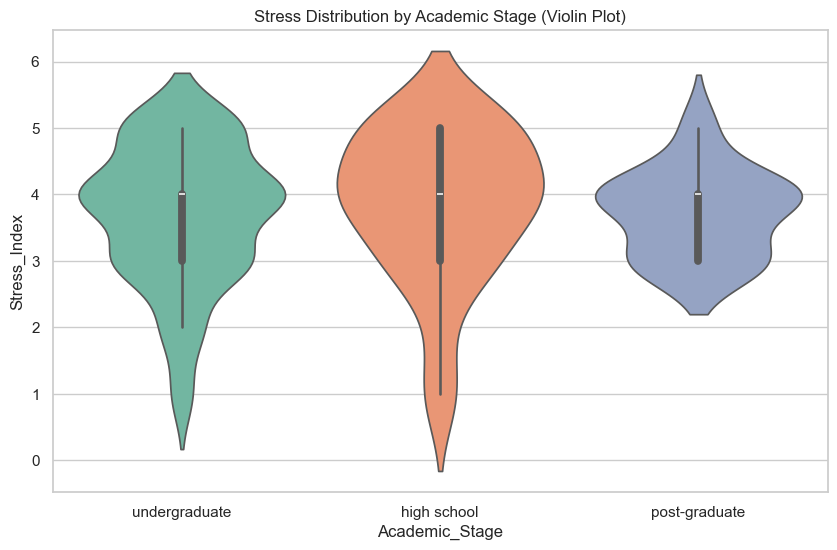

In [6]:
# Stress by Academic Stage
print("Stress Index by Academic Stage:")
print(df.groupby('Academic_Stage')['Stress_Index'].describe())

# Box plot
plt.figure(figsize=(10, 6))
df.boxplot(column='Stress_Index', by='Academic_Stage', figsize=(10, 6))
plt.title('Stress Index Distribution by Academic Stage')
plt.suptitle('')
plt.ylabel('Stress Index')
plt.xlabel('Academic Stage')
plt.show()

# Violin plot for detailed comparison
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Academic_Stage', y='Stress_Index', palette='Set2')
plt.title('Stress Distribution by Academic Stage (Violin Plot)')
plt.show()

## Section 5: Correlation Analysis Between Variables

Correlation Matrix:


,Peer_Pressure,Academic_Pressure_Home,Academic_Competition,Stress_Index
Peer_Pressure,1.000000,0.370275,0.200558,0.474426
Academic_Pressure_Home,0.370275,1.000000,0.129759,0.409219
Academic_Competition,0.200558,0.129759,1.000000,0.448767
Stress_Index,0.474426,0.409219,0.448767,1.000000


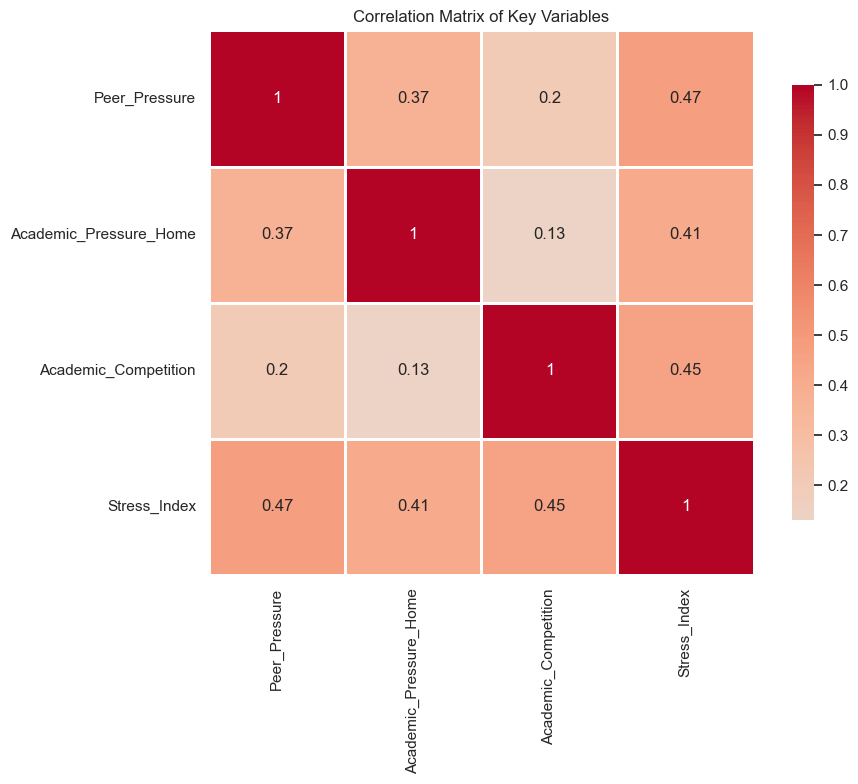



Correlation with Stress Index:
Stress_Index              1.000000
Peer_Pressure             0.474426
Academic_Competition      0.448767
Academic_Pressure_Home    0.409219
Name: Stress_Index, dtype: float64


In [7]:
# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

print("Correlation Matrix:")
display(corr_matrix)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.show()

# Highlight strong correlations with Stress Index
stress_corr = df[numeric_cols].corr()['Stress_Index'].sort_values(ascending=False)
print("\n\nCorrelation with Stress Index:")
print(stress_corr)

## Section 6: Coping Strategies and Stress Levels

Stress Index by Coping Strategy:
                                                        mean       std  count
Coping_Strategy                                                              
Emotional breakdown (crying a lot)                  3.968750  1.149597     32
Social support (friends, family)                    3.666667  1.016530     21
Analyze the situation and handle it with intellect  3.643678  0.988033     87


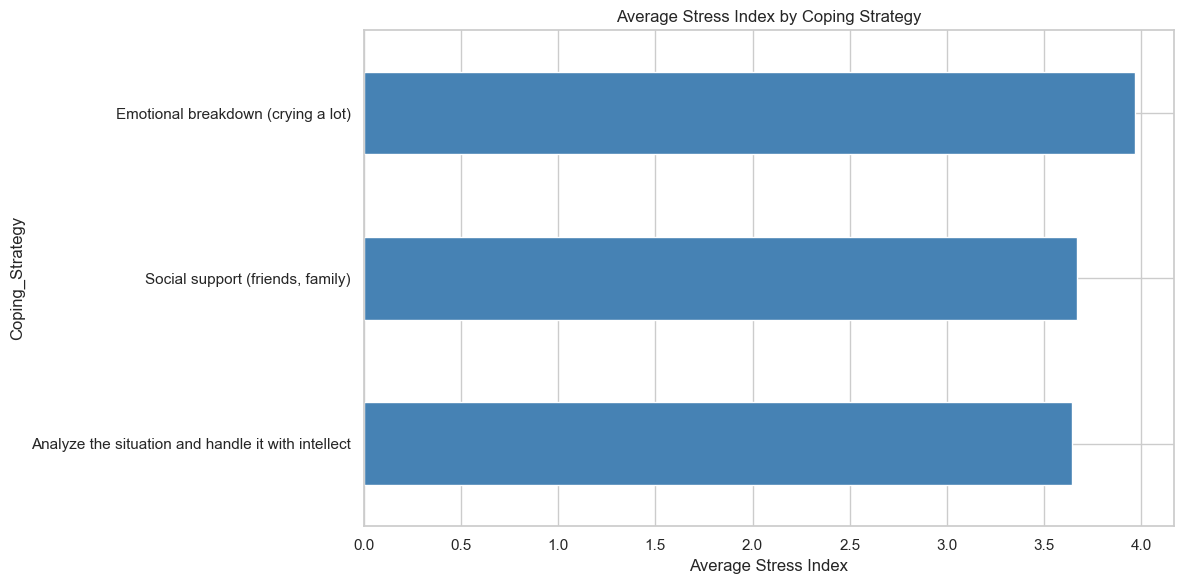

C:\Users\josep\AppData\Local\Temp\ipykernel_17664\146643274.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Coping_Strategy', x='Stress_Index', palette='Set2')


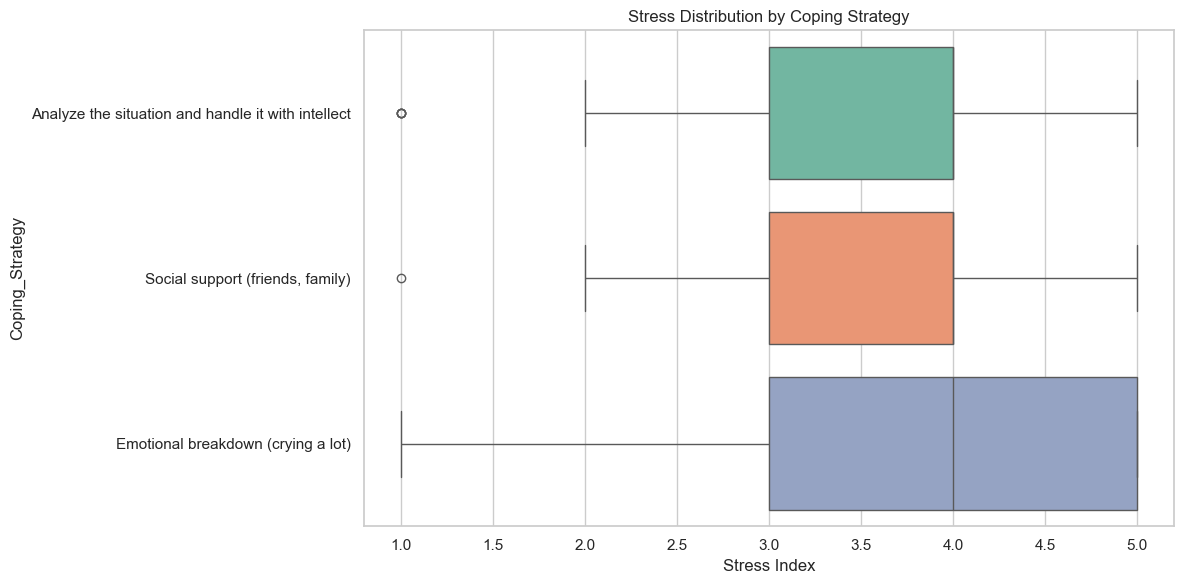

In [8]:
# Stress by Coping Strategy
print("Stress Index by Coping Strategy:")
coping_stress = df.groupby('Coping_Strategy')['Stress_Index'].agg(['mean', 'std', 'count'])
print(coping_stress.sort_values('mean', ascending=False))

# Bar plot for coping strategies
plt.figure(figsize=(12, 6))
coping_means = df.groupby('Coping_Strategy')['Stress_Index'].mean().sort_values()
coping_means.plot(kind='barh', color='steelblue')
plt.title('Average Stress Index by Coping Strategy')
plt.xlabel('Average Stress Index')
plt.tight_layout()
plt.show()

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='Coping_Strategy', x='Stress_Index', palette='Set2')
plt.title('Stress Distribution by Coping Strategy')
plt.xlabel('Stress Index')
plt.tight_layout()
plt.show()

## Section 7: Environmental Impact on Stress

Stress Index by Study Environment:
                       mean       std  count
Study_Environment                           
disrupted          4.026316  0.914946     38
Unknown            4.000000       NaN      1
Noisy              3.843750  1.050633     32
Peaceful           3.492754  1.051934     69


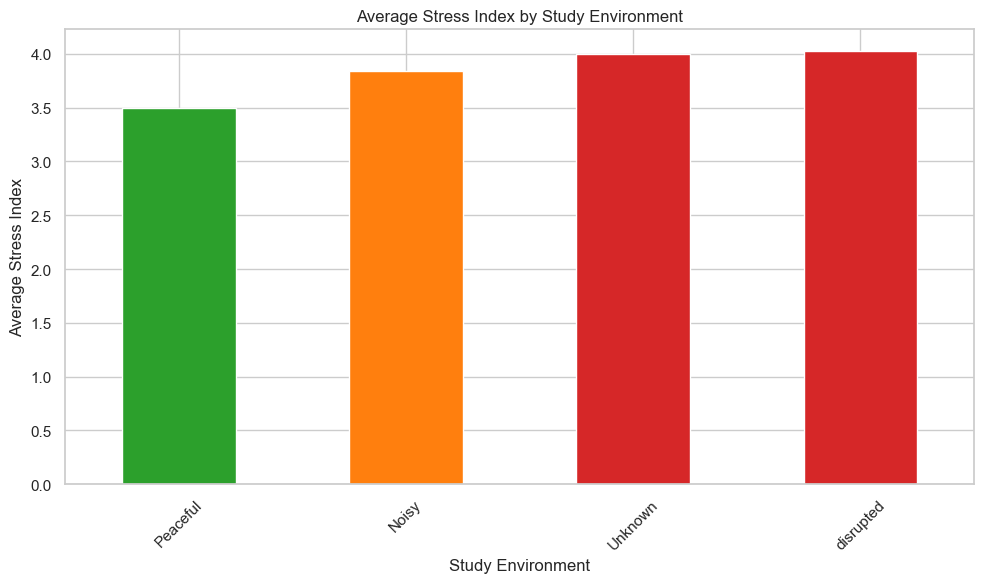

C:\Users\josep\AppData\Local\Temp\ipykernel_17664\322487784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Study_Environment', y='Stress_Index', palette='Set2')


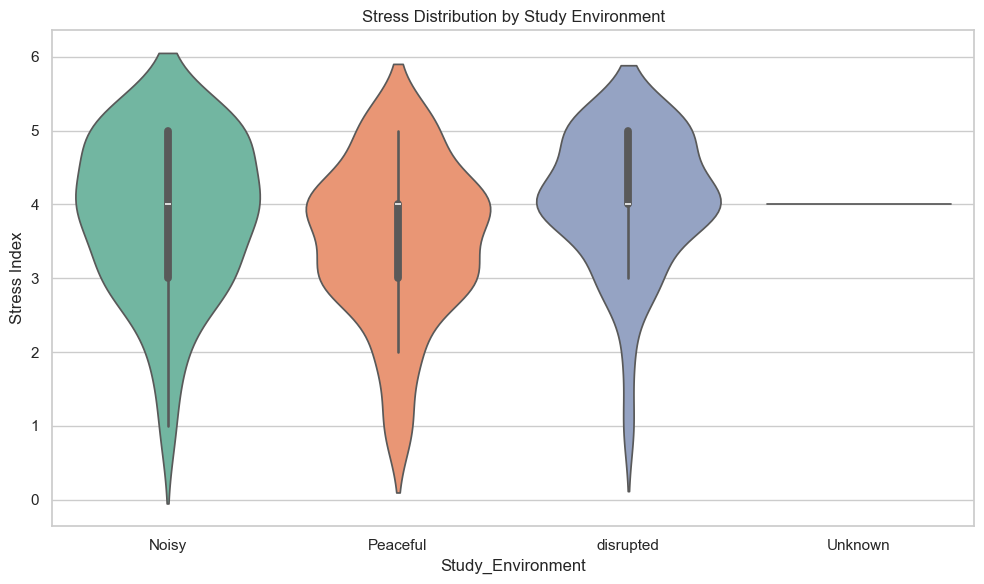



Cross-tabulation: Study Environment vs Coping Strategy
Coping_Strategy    Analyze the situation and handle it with intellect  \
Study_Environment                                                       
Noisy                                                             20    
Peaceful                                                          49    
Unknown                                                            0    
disrupted                                                         18    
All                                                               87    

Coping_Strategy    Emotional breakdown (crying a lot)  \
Study_Environment                                       
Noisy                                              10   
Peaceful                                            8   
Unknown                                             1   
disrupted                                          13   
All                                                32   

Coping_Strategy    Social suppo

In [9]:
# Stress by Study Environment
print("Stress Index by Study Environment:")
env_stress = df.groupby('Study_Environment')['Stress_Index'].agg(['mean', 'std', 'count'])
print(env_stress.sort_values('mean', ascending=False))

# Bar plot for study environment
plt.figure(figsize=(10, 6))
env_means = df.groupby('Study_Environment')['Stress_Index'].mean().sort_values()
colors = ['#ff7f0e' if x == 'Noisy' else '#2ca02c' if x == 'Peaceful' else '#d62728' for x in env_means.index]
env_means.plot(kind='bar', color=colors)
plt.title('Average Stress Index by Study Environment')
plt.ylabel('Average Stress Index')
plt.xlabel('Study Environment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Study_Environment', y='Stress_Index', palette='Set2')
plt.title('Stress Distribution by Study Environment')
plt.ylabel('Stress Index')
plt.tight_layout()
plt.show()

# Cross-tabulation: Environment and Coping Strategy
print("\n\nCross-tabulation: Study Environment vs Coping Strategy")
cross_tab = pd.crosstab(df['Study_Environment'], df['Coping_Strategy'], margins=True)
print(cross_tab)

## Section 8: Statistical Summary and Key Insights

In [10]:
# Summary of key findings
print("=" * 70)
print("KEY FINDINGS AND INSIGHTS")
print("=" * 70)

print("\n1. OVERALL STRESS STATISTICS:")
print(f"   - Mean Stress Index: {df['Stress_Index'].mean():.2f}")
print(f"   - Median Stress Index: {df['Stress_Index'].median():.2f}")
print(f"   - Std Dev: {df['Stress_Index'].std():.2f}")
print(f"   - Range: {df['Stress_Index'].min():.0f} to {df['Stress_Index'].max():.0f}")

print("\n2. STRESS BY ACADEMIC STAGE:")
for stage in df['Academic_Stage'].unique():
    stage_data = df[df['Academic_Stage'] == stage]['Stress_Index']
    print(f"   - {stage}: Mean = {stage_data.mean():.2f}, Median = {stage_data.median():.2f}, N = {len(stage_data)}")

print("\n3. STRONGEST CORRELATIONS WITH STRESS INDEX:")
stress_corr = df[numeric_cols].corr()['Stress_Index'].drop('Stress_Index').sort_values(ascending=False)
for var, corr in stress_corr.items():
    print(f"   - {var}: {corr:.3f}")

print("\n4. IMPACT OF STUDY ENVIRONMENT:")
for env in df['Study_Environment'].dropna().unique():
    env_data = df[df['Study_Environment'] == env]['Stress_Index']
    print(f"   - {env}: Mean = {env_data.mean():.2f}, Median = {env_data.median():.2f}, N = {len(env_data)}")

print("\n5. EFFECTIVENESS OF COPING STRATEGIES:")
for strategy in df['Coping_Strategy'].unique():
    strat_data = df[df['Coping_Strategy'] == strategy]['Stress_Index']
    print(f"   - {strategy}: Mean = {strat_data.mean():.2f}, Median = {strat_data.median():.2f}, N = {len(strat_data)}")

print("\n6. IMPACT OF LIFESTYLE HABITS:")
for habit in df['Bad_Habits'].dropna().unique():
    habit_data = df[df['Bad_Habits'] == habit]['Stress_Index']
    print(f"   - {habit}: Mean = {habit_data.mean():.2f}, N = {len(habit_data)}")

KEY FINDINGS AND INSIGHTS

1. OVERALL STRESS STATISTICS:
   - Mean Stress Index: 3.72
   - Median Stress Index: 4.00
   - Std Dev: 1.03
   - Range: 1 to 5

2. STRESS BY ACADEMIC STAGE:
   - undergraduate: Mean = 3.69, Median = 4.00, N = 100
   - high school: Mean = 3.83, Median = 4.00, N = 29
   - post-graduate: Mean = 3.73, Median = 4.00, N = 11

3. STRONGEST CORRELATIONS WITH STRESS INDEX:
   - Peer_Pressure: 0.474
   - Academic_Competition: 0.449
   - Academic_Pressure_Home: 0.409

4. IMPACT OF STUDY ENVIRONMENT:
   - Noisy: Mean = 3.84, Median = 4.00, N = 32
   - Peaceful: Mean = 3.49, Median = 4.00, N = 69
   - disrupted: Mean = 4.03, Median = 4.00, N = 38
   - Unknown: Mean = 4.00, Median = 4.00, N = 1

5. EFFECTIVENESS OF COPING STRATEGIES:
   - Analyze the situation and handle it with intellect: Mean = 3.64, Median = 4.00, N = 87
   - Social support (friends, family): Mean = 3.67, Median = 4.00, N = 21
   - Emotional breakdown (crying a lot): Mean = 3.97, Median = 4.00, N = 32


## Conclusions and Recommendations

Based on the analysis of academic stress survey data, the following insights emerge:

### Key Findings:
1. **Peer and Academic Pressure**: Both peer pressure and academic pressure from home show moderate to strong positive correlations with stress levels, indicating these are significant stressors.

2. **Study Environment Matters**: Students in peaceful study environments report lower average stress levels compared to those in noisy or disrupted environments.

3. **Coping Strategy Effectiveness**: 
   - Intellectual analysis of situations appears to be the most common coping strategy
   - Different coping strategies yield different stress outcomes

4. **Academic Stage Differences**: Stress levels vary across high school, undergraduate, and post-graduate students, reflecting different academic pressures at each stage.

5. **Lifestyle Habits**: Students with healthy habits (no smoking/drinking) report different stress patterns compared to those with unhealthy habits.

### Recommendations:
- **For Students**: Develop healthy coping mechanisms and maintain peaceful study environments
- **For Institutions**: Provide stress management resources and support, especially for high-pressure academic stages
- **For Researchers**: Further investigate causal relationships and effective interventions for academic stress reduction